<div align="center">

# Lecture 7: Web scraping with Python

ECON 294A, UC Santa Cruz

Pedro Vallocci

</div>

## 7.1. Introduction

Web scraping involves programmatically extracting data from websites. This technique is used to gather information from web pages in a structured format, allowing for further analysis, storage, or use in other applications.

For webscraping, our main packages will be:

- `requests`: an HTTP library for Python

- `bs4`: Beautiful Soup is a Python library designed to make the task of web scraping easy and intuitive. By providing tools to parse HTML and XML documents, it enables developers to extract data from web pages with minimal code. 

Naturally, the first step is to download both packages.

In [2]:
%pip install bs4
%pip install requests

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 7.2. HTML (HyperText Markup Language)

### 7.2.3. A short intro of HTML

At the core of every web page is HTML (HyperText Markup Language), the standard markup language used to create and design web pages. HTML tells a web browser how to display a web page's words, images, 
and other elements through a series of elements labeled by tags. For instance, `<h1>` tags are used for main headings, `<p>` tags for paragraphs, `<a>` tags for links, and `<img>` for images. These tags 
form the building blocks of a website, organizing content into a structured format that browsers can interpret.

To look at a website's HTML code, we can right-click at the website and Inspect it.

Let's take a look at a sample website: https://www.rottentomatoes.com/m/et_the_extraterrestrial

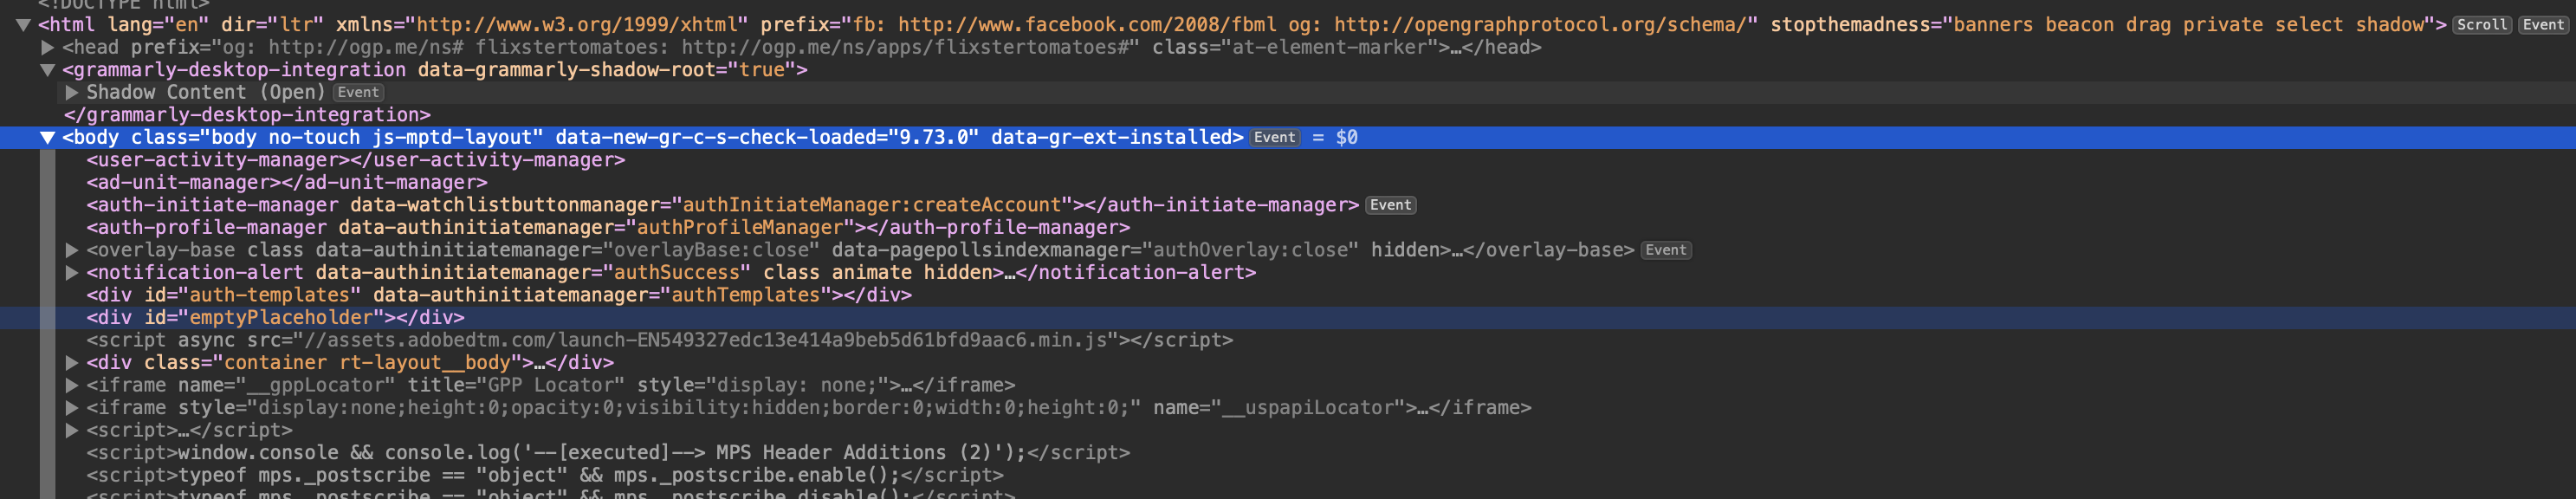

It helps to have basic knowledge of HTML for web scraping. HTML documents are structured like a tree, often referred to as the Document Object Model (DOM). This tree-like structure represents the hierarchy of HTML elements on a page, starting from a single root (usually the <html> tag) that branches out into nested elements. Each element in the HTML tree can have children (sub-elements), siblings (elements at the same level), and a parent (an element one level up). Think of a "genealogical tree"

Below, an example of a simple HTML structure.

```html 
<html>
<head>
    <title>Sample Page</title>
</head>
<body>
    <div>
        <h1>Main Heading</h1>
        <p>First paragraph of text.</p>
    </div>
    <div>
        <h2>Subheading</h2>
        <p>Second paragraph of text.</p>
    </div>
</body>
</html>
```

<< Draw tree structure on board >>

In this example, the `<html>` tag is the root of the tree. The `<head>` and `<body>` tags are its children. Each `<div>` is a child of `<body>` and a parent to `<h1>`, `<h2>`, and `<p>` tags. Understanding this hierarchical relationship is key when you want to navigate through this structure programmatically during web scraping.

### 7.2.2. Importance of HTML in Web Scraping

When scraping data from a web page using tools like BeautifulSoup in Python, you use the HTML tree structure to locate and extract specific data:

- Navigating the Structure: Knowing the tree-like structure helps you decide how to navigate to specific elements. For instance, if you are interested in extracting all paragraphs inside a certain `<div>`, you need to identify the path through the tree to reach these paragraphs.

- Using Selectors: Tools like BeautifulSoup allow you to use CSS selectors, which are patterns used to select the elements you want based on their position in the DOM hierarchy, tag name, attribute, etc. Understanding the HTML structure lets you craft accurate selectors that pinpoint the data you need.

- Handling Nested Data: Many web pages contain complex layouts with nested data. For instance, a list might be within a table cell, which is in turn within a row. Understanding HTML's tree structure enables you to write scripts that correctly traverse these nested structures to extract data.

An example will illustrate the concepts above.


## 7.3. `requests`

To retrieve the whole HTML code from a website, we can use the requests package.

In [3]:
import requests
html_doc = requests.get('https://www.rottentomatoes.com/m/et_the_extraterrestrial').text

## IN-CLASS:
1) Print `html_doc`. Make it a scrollable element in VS Code, so that you get a sense of this website's looong source code. Can you see the code's tree-like structure?

2) Search (Ctrl+F / Cmd+F) the critics' review cards inside your HTML code. Hint: after printing the html, search `review-card-critic` in the output.

## 7.4. `BeautifulSoup`

### 7.4.1. Creating the soup

Beautiful Soup is a Python library for parsing HTML and XML documents. It creates parse trees that are helpful to extract the data easily, often used for web scraping.

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
soup

<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="fb: http://www.facebook.com/2008/fbml og: http://opengraphprotocol.org/schema/" xmlns="http://www.w3.org/1999/xhtml">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<script charset="UTF-8" crossorigin="anonymous" data-domain-script="7e979733-6841-4fce-9182-515fac69187f" integrity="sha384-TKdmlzVmoD70HzftTw4WtOzIBL5mNx8mXSRzEvwrWjpIJ7FZ/EuX758yMDWXtRUN" src="https://cdn.cookielaw.org/consent/7e979733-6841-4fce-9182-515fac69187f/otSDKStub.js" type="text/javascript">
</script>
<script type="text/javascript">
                function OptanonWrapper() { }
            </script>
<script ccpa-opt-out-geo="US" ccpa-opt-out-ids="USP" ccpa-opt-out-lspa="false" charset="UTF-8" src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js" type="text/javascript">
</script>
<script src="/assets/pizza-pie/javascripts/bundles/roma/rt-common.js?single"></script>
<meta content="text/html; charset=utf-8" http-equiv=

### 7.4.2. The soup's main selling point: easily accessing HTML content

A `soup` object has useful methods and properties, such as `title`.

In [5]:
print(soup.title)
print(soup.title.string)

<title>E.T. the Extra-Terrestrial | Rotten Tomatoes</title>
E.T. the Extra-Terrestrial | Rotten Tomatoes


## IN-CLASS:
Print `soup.head`. Notice that we get what we had seen between the `<head>` and `</head>` directives in the HTML code above.

Another common task is extracting all the text from a page. `get_text()` strips all non-text out of the soup.

In [8]:
print(soup.get_text())












E.T. the Extra-Terrestrial | Rotten Tomatoes























































Signed in
















Skip to Main Content






























          Cancel
        



Movies / TV



Celebrity



No Results Found

View All




What's the Tomatometer®?
Critics



Login/signup

















           Wants to See
        



           Ratings
        
Profile
Account
Log Out





Movies


Movies in theaters


Opening this week


Top box office


Coming soon to theaters


Certified fresh movies




Movies at home


Peacock


Fandango at Home


Netflix streaming


Apple TV


Prime Video


Most popular streaming movies


Certified fresh movies


Browse all




More


What to WatchNew


Top movies


Trailers




Certified fresh picks







Kingdom of the Planet of the Apes
Link to Kingdom of the Planet of the Apes










The Fall Guy
Link to The Fall Guy










The Last Stop in Yuma County
Link to The Last Stop in Yuma County







You can be specific with a `BeautifulSoup` object. For example, upon hovering on a critic's review card and inspecting it, we find out that all the information enclosed on the card, seems to be described in a piece of HTML code enclosed within the `<review-card-critic ...>` directive. Using `BeautifulSoup`, we can find either all the nodes named `<review-card-critic ...>` (using `soup.find_all()`) or we can pull one by one (using `soup.find()`). Follow the next example.
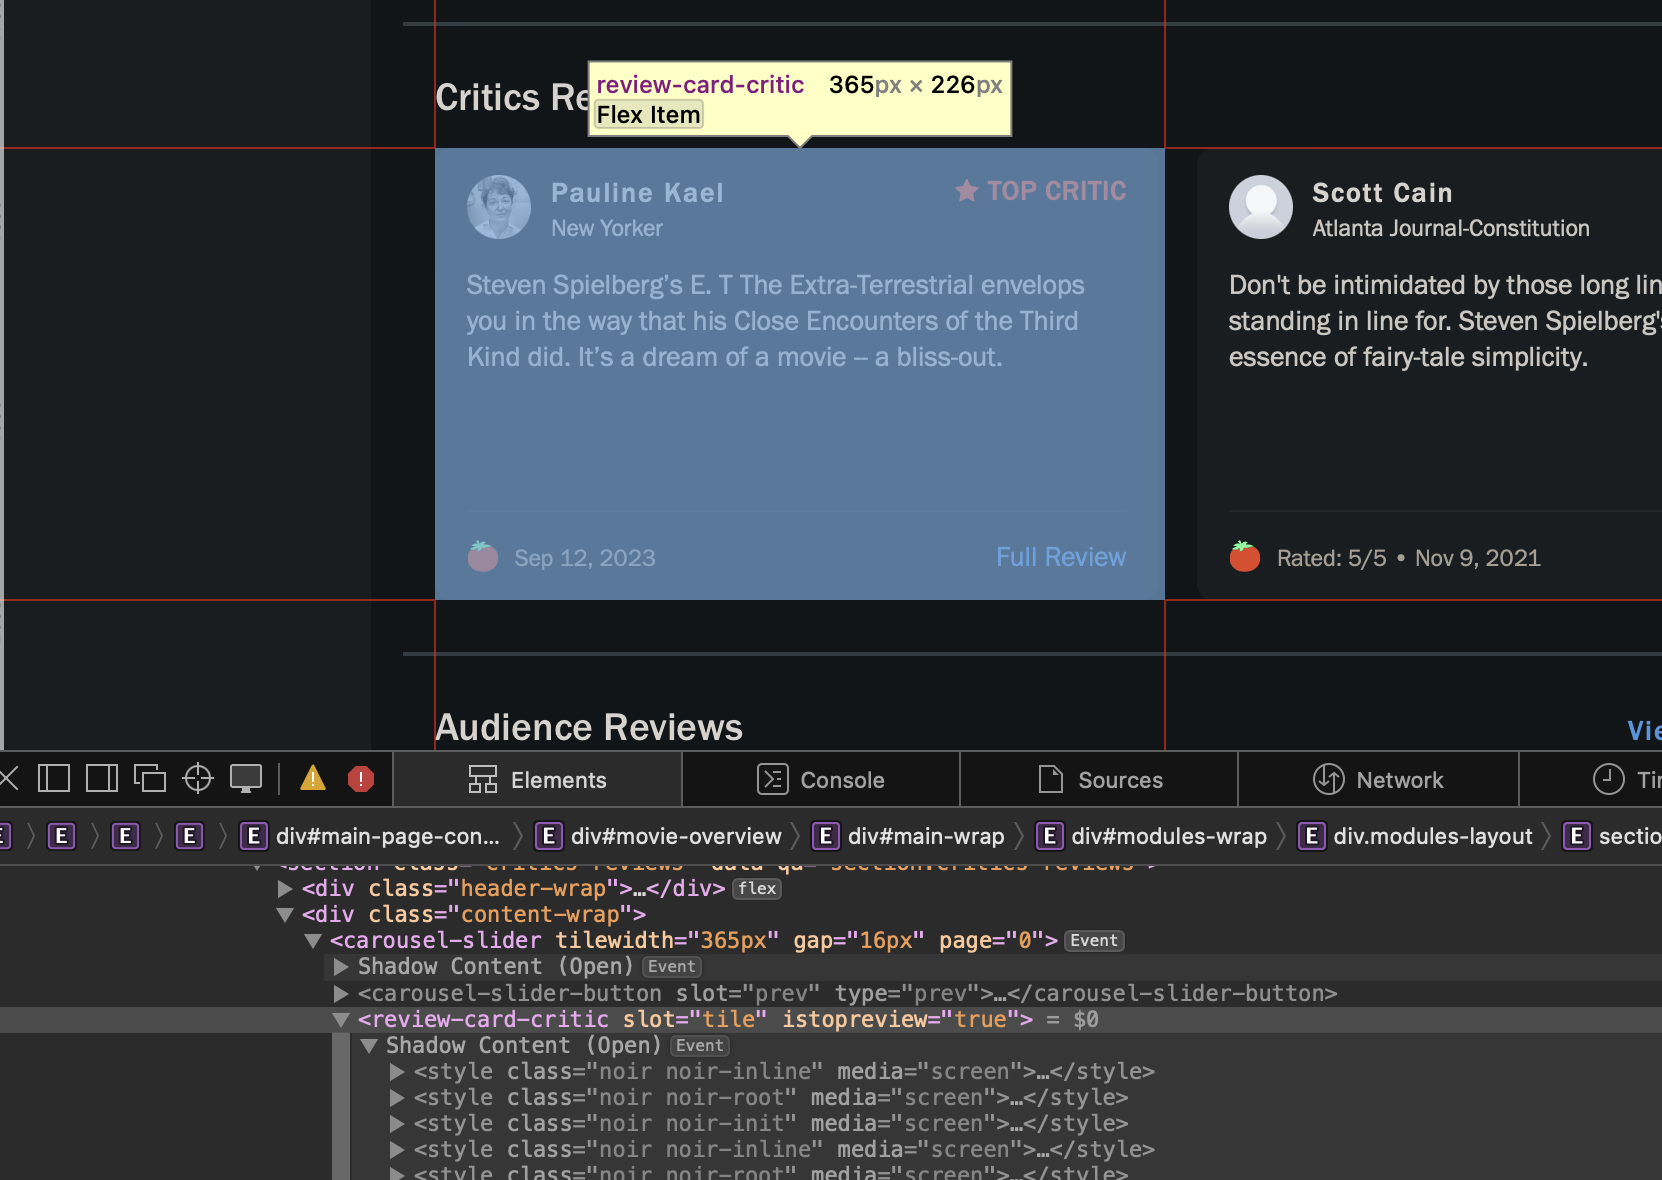

What's inside an example of a `review-card-critic` node?

In [ ]:
review = soup.find('review-card-critic')
print(review)

Upon close examination, we see that each critic's text review is inside each node `rt-text` whose attribute `slot` is equal to `content`. We can filter exactly that by following the commands:

In [18]:
review = soup.find('review-card-critic')
review.find('rt-text', slot="content").get_text().strip()

'Steven Spielberg’s E. T The Extra-Terrestrial envelops you in the way that his Close Encounters of the Third Kind did. It’s a dream of a movie -- a bliss-out.'

Knowing this pattern, we can use `find_all` to repeat the commands above for all matching nodes.

In [22]:
reviews = soup.find_all('review-card-critic')
review_list = []
for review in reviews:
    review_list.append(review.find('rt-text', slot="content").get_text().strip())

review_list

['Steven Spielberg’s E. T The Extra-Terrestrial envelops you in the way that his Close Encounters of the Third Kind did. It’s a dream of a movie -- a bliss-out.',
 "Don't be intimidated by those long lines. E.T. is worth standing in line for. Steven Spielberg's story is the essence of fairy-tale simplicity.",
 'This is a real movie, with all those elements that have proved sure-fire through history; Laughter, tears, involvement, thrills, wonderment. Steven Spielberg also adds a message: Human beings and spacelings should learn to co-exist.',
 'E.T. The Extra-Terrestrial is a spellbinding foray that reminds us of human compassion and the eternal joy of cinema.',
 'Steven Spielberg has given audiences dozens of great films over the years, but no movie has captured childlike wonder quite like E.T.',
 '... while far tamer in its final presentation, "E.T." is a scary film and would’ve likely made for a terrifying time, though I do think, all things being equal, that history is better for wh

## IN-CLASS: 
Choose another movie of your liking. Follow the same procedure as above to scrape rottentomatoes.com and download the **audience reviews** (not the critic reviews)

### 7.4.3. Other `BeautifulSoup` commands.

Using `children`, `parent`, `siblings` you can navigate in the tree.

In [2]:
review.children

NameError: name 'review' is not defined

`soup.prettify()` prints the HTML code in a mode readable way, indenting when useful.

In [11]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="fb: http://www.facebook.com/2008/fbml og: http://opengraphprotocol.org/schema/" xmlns="http://www.w3.org/1999/xhtml">
 <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
  <script charset="UTF-8" crossorigin="anonymous" data-domain-script="7e979733-6841-4fce-9182-515fac69187f" integrity="sha384-TKdmlzVmoD70HzftTw4WtOzIBL5mNx8mXSRzEvwrWjpIJ7FZ/EuX758yMDWXtRUN" src="https://cdn.cookielaw.org/consent/7e979733-6841-4fce-9182-515fac69187f/otSDKStub.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   function OptanonWrapper() { }
  </script>
  <script ccpa-opt-out-geo="US" ccpa-opt-out-ids="USP" ccpa-opt-out-lspa="false" charset="UTF-8" src="https://cdn.cookielaw.org/opt-out/otCCPAiab.js" type="text/javascript">
  </script>
  <script src="/assets/pizza-pie/javascripts/bundles/roma/rt-common.js?single">
  </script>
  <meta content="text/html; charset=utf-8" http-equiv="Conte

## 7.5. Remote controlling your browser: meet `Selenium`

`Selenium` is a package that allows us to interact with HTML elements from any website, rather than just scrape information.

Common tasks you could do with `Selenium` are:
- Drag and drop
- Clicking on a button
- Filling out a form
- Finding elements in the source code
- Etc.

First, we need to:

- Install `selenium` using `pip`

- Install Chrome web driver on https://sites.google.com/chromium.org/driver/. Install the Chrome web driver associated with your current Google Chrome installation. **You need both the browser and the web driver to run the code that follows.**

In [ ]:
%pip install selenium

Note: you may need to restart the kernel to use updated packages.


Installing the web driver requires some steps. This is a good video that describes them: https://www.youtube.com/watch?v=Xjv1sY630Uc&list=PLzMcBGfZo4-n40rB1XaJ0ak1bemvlqumQ

1. Check what Google Chrome version you have. 

<img src="check_chrome_version.png" alt="check_chrome_version" width="600">

2. As of 14 May 2024, the newest Chrome version is the 124. Upgrade to it if you haven't.

3. Download your Chrome web driver from https://googlechromelabs.github.io/chrome-for-testing/. In the table below, search for "chromedriver" in the left and match your operational system:

    - Windows, with 32 or 64 bits (win32/win64)
    - Linux (linux64)
    - Mac with Apple Silicon (chip M1 or newer) (mac-arm64)
    - Mac with Intel chips (mac-x64)

4. If you have a Mac, it may refuse to open the driver as it wasn't downloaded from the App Store. You may deactivate this under System Settings > Privacy and Security.

5. Move your chromedriver to a location you'll remember, as you'll need to reference it, as the code snippet below shows.

## IN-CLASS:
Take 5 minutes to try to install Chrome's web driver so you can follow along the next steps. If you find an issue, don't worry -- just pay attention in class and try to install it at home.

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
service = Service(executable_path = '/Users/pedrovallocci/Applications/chromedriver')
driver = webdriver.Chrome(service=service)

In [ ]:
driver.get("https://www.google.com")
print(driver.title)

Google


Now we want to access the search bar, I can look for an identifier to access it. Upon clicking on the search bar and inspecting it, on any browser, we find that the search bar corresponds to a directive in HTML marked with the class name "gLFyf". << Show in browser >>

By running the following code, we can find the first input element with the class name gLFyf and interact with it.

In [ ]:
from selenium.webdriver.common.by import By
input_element = driver.find_element(By.CLASS_NAME, "gLFyf")

After locating this element, I can write what I want, as if I were using the keyboard. This procedure is automated using the method `send_keys()` of object `input_element` above.

In [ ]:
from selenium.webdriver.common.keys import Keys
import time
input_element.send_keys("Boxer dogs" + Keys.ENTER)

How can we steer our browser to click the first link which contains "Images"?

In [ ]:
link = driver.find_element(By.PARTIAL_LINK_TEXT, "Images")
link.click()

Now introducing two other commands:

- `time.sleep(n)`: Sometimes you want to wait for your page to load completely before you look for an element. This command requires your driver to wait for n seconds before doing anything else.

- `driver.quit`: Closes your browser.

In [ ]:
time.sleep(10)
driver.quit()

## 7.6. When not to use webscraping

### 7.6.1. When an API is available

If you can access your data through an API, this method is preferable. E.g., if you need to get:

    - Stock returns from Yahoo Finance

    - Google search results

    - ChatGPT queries...

You'd get the results you want, in a cleaner way, by querying the API directly. Most websites impose limitations to their API usage:   

- By limiting the traffic through their API

- By charging by gigabytes of traffic, or by number of queries

- By charging for all commercial use.

An example is Google's Custom Search JSON API (https://developers.google.com/custom-search/v1/overview). 

![image.png](attachment:image.png)

### 7.6.2. When webscraping is not allowed: meet `robots.txt`

`robots.txt` is a primary tool used by websites to communicate with web crawlers and other automated bots about what parts of the site should not be accessed by these bots. 

<< Show an example >>

### What is robots.txt?

The robots.txt file is a plain text file placed in the root directory of a website. It uses the Robots Exclusion Protocol (REP) to inform automated web crawlers which parts of the website are off-limits to them. By doing so, it helps website administrators manage the load on their servers and protect sensitive data from being scraped.

Structure of robots.txt
A robots.txt file consists of one or more groups of directives, each starting with a user-agent line, followed by one or more rules:

- User-agent: Specifies which crawler the following rules apply to. A wildcard * may be used to refer to all crawlers.

- Disallow: Lists the URL path on the website that the crawler is not allowed to access.

- Allow: (optional) Explicitly permits access to certain parts of the site, even if a broader disallow rule might exist.

## IN-CLASS:
Open the robots.txt file for a site of your preference (Wikipedia, StackOverflow, WSJ...)


## 7.7. Study case: Downloading earnings calls' transcripts

Follow the accompanying download_earnings_calls.py to see how can we leverage web scraping to get useful economic data: here, the transcript of earnings calls. An earnings call is teleconference in which a public company (stock exchange listed company) discusses the financial results of a reporting period. 

<< Show an example on Motley Fool >>

## IN-CLASS: 

Why would I want to download earnings calls' textual data? What could I do with it?